# APS 5 - Questões com auxílio do Pandas

** Nome: ** Hugo Gonçalves Rocha


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [79]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [80]:
#Abrir o arquivo
df = pd.read_csv('earthquake(1).csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [81]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [82]:
df.loc[(df['Latitude']>0),'Hemisfério']='Norte'
df.loc[(df['Latitude']<0),'Hemisfério']='Sul'

df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Hemisfério
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

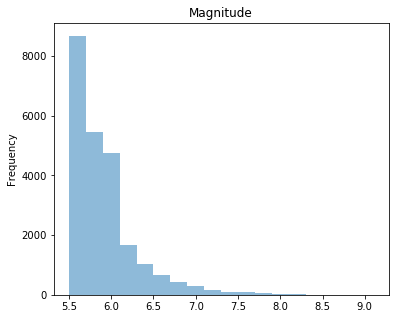

In [83]:
faixa = np.arange(5.5,9.2,0.2)
plot = df['Magnitude'].plot.hist(bins=faixa, title='Magnitude', figsize=(6,5), normed = 0, alpha=0.5)

** Pelo histograma, desprende-se que a maioria dos tremores se encontra na faixa entre 5.5 e 6.0 graus de magnitude. Sendo assim, a média provavelmente se encontra dentro deste intervalo. **

In [84]:
df['Magnitude'].describe()

count    23412.000000
mean         5.882531
std          0.423066
min          5.500000
25%          5.600000
50%          5.700000
75%          6.000000
max          9.100000
Name: Magnitude, dtype: float64

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [85]:
mag = df['Magnitude'].mean()
lambda1 = 1/mag
sigma = 1/lambda1
x = 100
scale = mag
loc = 0

magnitude = expon.rvs(loc,scale,x)

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

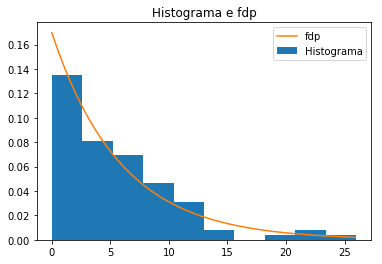

In [115]:
plt.hist(magnitude, normed = True)
faixa = np.arange(magnitude.min(),magnitude.max(),0.1)
plt.plot(faixa,expon.pdf(faixa,loc,scale))
plt.title('Histograma e fdp')
plt.legend(['fdp','Histograma'])

** Tanto o histograma quando a área abaixo da curva da fdp possuem área 1. **

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [87]:
ct=pd.crosstab(df['Hemisfério'], df['Type'], margins=True, rownames=['Hemisfério'], colnames=['Tipo'], normalize=True)*100
ct

Tipo,Earthquake,Explosion,Nuclear Explosion,Rock Burst,All
Hemisfério,,,,,
Norte,44.714023,0.008543,0.627910,0.000000,45.350476
Sul,54.517107,0.008543,0.119602,0.004271,54.649524
All,99.231131,0.017086,0.747512,0.004271,100.000000


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

**A probabilidade de ocorrer um terremoto no hemisfério norte, pela tabela cruzada acima, é de 44,71%.**

Explique o seu raciocínio

** Como a crosstab acima mostra a porcentagem de recorrências de cada tipo de tremor em cada hemisfério relativo ao número total de tremores no planeta, tem-se entre todos os tremores registrados, a probabilidade de ocorrer um no hemisfério norte cuja a causa seja um terremoto é de 44,71%. **

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [88]:
ct2 = pd.crosstab(df['Hemisfério'], df['Type'], margins=True, rownames=['Hemisfério'], colnames=['Tipo'])

# Total de tremores no Hemisfério Norte
tremores_norte = 10617

#Total de tremores cuja causalidade foi explosão nuclear
nucleares = 147

print(ct2)
print(' ')
print(nucleares/tremores_norte)

Tipo        Earthquake  Explosion  Nuclear Explosion  Rock Burst    All
Hemisfério                                                             
Norte            10468          2                147           0  10617
Sul              12763          2                 28           1  12794
All              23231          4                175           1  23411
 
0.013845719129697655


** Portanto, a probabilidade de um tremor no Hemisfério Norte ter sido causado por uma bomba nuclear é de 0,0138, ou 1,38%.**

Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

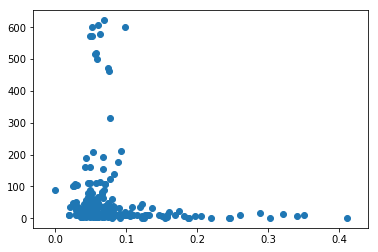

In [111]:
df2 = df.dropna(subset=['Magnitude Error', 'Depth'])

plt.scatter(df2['Magnitude Error'], df2['Depth'])

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [103]:
print("Correlação entre Magnitude Error e Depth:",np.corrcoef(df2['Magnitude Error'],df2.Depth)[0,1])

Correlação entre Magnitude Error e Depth: -0.481298525326


Explique o que significa o valor da correlação calculada acima? 

** Por ser negativa, a correlação acima indica que ao passo que uma das variáveis cresce, a outra decresce. Ainda, como não é um valor muito pequeno (-0.5), sabe-se que a esse decrescimento ocorre levemente. **

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [104]:
df['Latitude'].describe()

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

In [105]:
df['Longitude'].describe()

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64

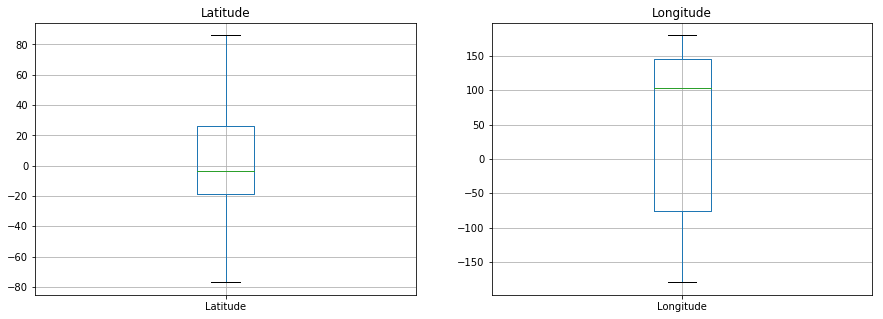

In [106]:
fig = plt.figure(figsize=(15,5))
plt.subplot(121)
plot_latitude = df['Latitude'].plot(kind='box',title='Latitude')
plt.grid()

plt.subplot(122)
plot_longitude = df['Longitude'].plot(kind='box',title='Longitude')
plt.grid()

** No describe, os intervalos 25%, 50%, 75% e max são os quatro quartis da distribuição da variável, na qual o valor de 50% é a mediana. No boxplot, o primeiro quartil é representado pelo limite inferior da caixa e o terceiro pelo limite superior da caixa. A linha do meio representa o segundo quartil, ou seja, a mediana. As linhas por fora da caixa vão do valor mínimo ao máximo medido naquela variável. No caso acima, vê-se que a longitude possui uma dispersão maior de dados em relação à latitude. Isso se deve pelo fato do intervalo entre o primeiro e o terceiro quartil da longitude abranger muito mais valores do que os da latitude. Em termos de assimetria, nota-se que a distribuição da latitude possui uma pequena assimetria para a esquerda, enquanto a da longitude possui uma grande assimetria à direita.**

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [107]:
ct3=pd.crosstab([df.Hemisfério,df['Magnitude Type']],df.Type,normalize=True)*100
ct3

Type                       Earthquake  Explosion  Nuclear Explosion  \
Hemisfério Magnitude Type                                             
Norte      MB                6.608852   0.008544           0.576726   
           MD                0.025632   0.000000           0.000000   
           MH                0.021360   0.000000           0.000000   
           ML                0.277683   0.000000           0.051265   
           MS                3.272386   0.000000           0.000000   
           MW               15.738209   0.000000           0.000000   
           MWB               4.750513   0.000000           0.000000   
           MWC              10.205913   0.000000           0.000000   
           MWR               0.051265   0.000000           0.000000   
           MWW               3.755126   0.000000           0.000000   
Sul        MB                8.744874   0.008544           0.119617   
           MS                3.994361   0.000000           0.000000   
           MW               17.250513   0.000000           0.000000   
           MWB               5.750171   0.000000           0.000000   
           MWC              14.008031   0.000000           0.000000   
           MWR               0.059809   0.000000           0.000000   
           MWW               4.716336   0.000000           0.000000   

Type                       Rock Burst  
Hemisfério Magnitude Type              
Norte      MB                0.000000  
           MD                0.000000  
           MH                0.000000  
           ML                0.000000  
           MS                0.000000  
           MW                0.000000  
           MWB               0.000000  
           MWC               0.000000  
           MWR               0.000000  
           MWW               0.000000  
Sul        MB                0.000000  
           MS                0.000000  
           MW                0.000000  
           MWB               0.000000  
           MWC               0.004272  
           MWR               0.000000  
           MWW               0.000000

** Pela tabela, vê-se que a probabilidade de ocorrer um tremor do tipo MB advindo de uma explosão nuclear no Hemisfério Norte é de 0,5767%. Já no Sul, a probabilidade é de 0,11%. Portanto, é mais provável ter ocorrido no Hemisfério Norte. **